In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('dataset.csv', delimiter=',',skiprows=[1])
df=df[df['class']!=1]
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '').str.replace('(', '').str.replace(')', '')
X = df.drop(['class'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()
y = df['class']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
x_tr,x_te,y_tr,y_te=train_test_split(X_std,y,test_size=0.2,random_state=0)

In [18]:
df

,x,y,z,class
0,0.003531,-0.001853,0.008628,N
1,0.001942,0.002409,0.010300,N
2,-0.001358,0.006674,0.009620,N
3,0.007632,-0.001771,0.005369,N
4,0.001525,0.002003,0.005182,N
5,0.002095,0.001336,0.003453,N
6,0.001163,-0.001847,0.000978,N
7,-0.000332,-0.003960,0.000541,N
8,0.000462,-0.002722,0.000358,N
9,0.003104,-0.004889,-0.009851,N


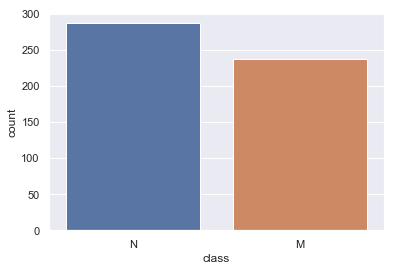

In [17]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=df)

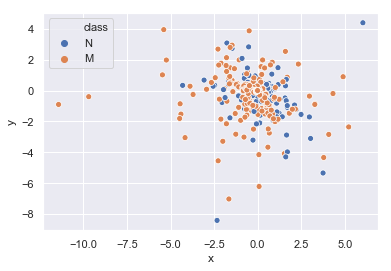

In [19]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="x", y="y", hue="class", data=df)

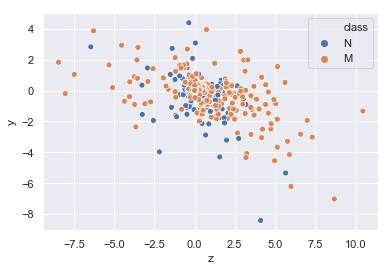

In [20]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="z", y="y", hue="class", data=df)

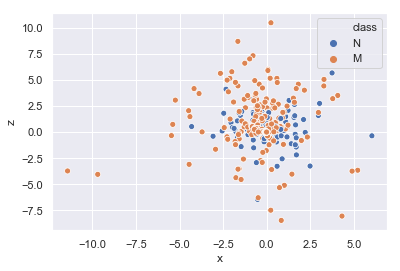

In [21]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="x", y="z", hue="class", data=df)

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svclassifierlinear = SVC(kernel='linear')
svclassifierlinear.fit(x_tr,y_tr)
y_pred=svclassifierlinear.predict(x_te)
accuracy_score(y_te,y_pred)

0.6761904761904762

[[16 33]
 [ 1 55]]


[[16 33]
 [ 1 55]]


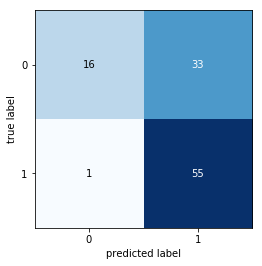

linear Accuracy is 0.6761904761904762
linear precision is 0.32653061224489793
linear recall is 0.9411764705882353


In [11]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = y_te.tolist()
predicted =y_pred.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()
accuracy=(results[0][0]+results[1][1])/((results[0][0]+results[1][1])+(results[0][1]+results[1][0]))
print("linear Accuracy is "+str(accuracy))
precision=results[0][0]/(results[0][0]+results[0][1])
print("linear precision is "+str(precision))
recall=results[0][0]/(results[0][0]+results[1][0])
print("linear recall is "+str(recall))

0.6761904761904762


In [13]:
svclassifierrbf = SVC(kernel='rbf')
svclassifierrbf.fit(x_tr, y_tr)
y_pred=svclassifierrbf.predict(x_te)
accuracy_score(y_te,y_pred)

C:\Users\ningesh\Anaconda3\envs\project\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7619047619047619

[[33 16]
 [ 9 47]]


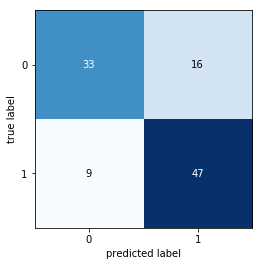

rbf Accuracy is 0.7619047619047619
rbf precision is 0.673469387755102
rbf recall is 0.7857142857142857


In [14]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = y_te.tolist()
predicted =y_pred.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()
accuracy=(results[0][0]+results[1][1])/((results[0][0]+results[1][1])+(results[0][1]+results[1][0]))
print("rbf Accuracy is "+str(accuracy))
precision=results[0][0]/(results[0][0]+results[0][1])
print("rbf precision is "+str(precision))
recall=results[0][0]/(results[0][0]+results[1][0])
print("rbf recall is "+str(recall))

In [15]:
svclassifiersigmoid = SVC(kernel='sigmoid')
svclassifiersigmoid.fit(x_tr, y_tr)
y_pred=svclassifiersigmoid.predict(x_te)
accuracy_score(y_te,y_pred)

C:\Users\ningesh\Anaconda3\envs\project\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7428571428571429

[[34 15]
 [12 44]]


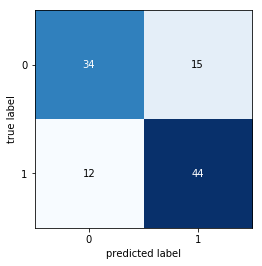

sigmoid Accuracy is 0.7428571428571429
sigmoid precision is 0.6938775510204082
sigmoid recall is 0.7391304347826086


In [16]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = y_te.tolist()
predicted =y_pred.tolist()
results = confusion_matrix(expected, predicted)
print(results)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array(results)

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()
accuracy=(results[0][0]+results[1][1])/((results[0][0]+results[1][1])+(results[0][1]+results[1][0]))
print("sigmoid Accuracy is "+str(accuracy))
precision=results[0][0]/(results[0][0]+results[0][1])
print("sigmoid precision is "+str(precision))
recall=results[0][0]/(results[0][0]+results[1][0])
print("sigmoid recall is "+str(recall))

In [5]:
import pickle

In [6]:

filename = 'linear_svm_model.sav'
pickle.dump(svclassifierlinear, open(filename, 'wb'))